<a href="https://colab.research.google.com/github/kashishbansal03/Network-Intrusion-detection/blob/main/Network_Intrusion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **```MAJOR PROJECT- NETWORK INTRUSION DETECTION```**



> Team Members-

                1) KASHISH BANSAL (03701012021)
                2) SONA VARSHNEY (23701012021)
                3) NIKITA GARG (05301032021)

Project Goals:


The primary goal of this project is to evaluate and enhance network cybersecurity by developing an effective and efficient intrusion detection system (IDS) that utilizes machine learning algorithms. The project aims to achieve the following objectives:

1. Evaluate the effectiveness of various binary classification algorithms for network intrusion detection using the UNSW-NB15 dataset. This involves training and testing multiple algorithms to determine their performance in distinguishing between 'bad connections' (intrusion/attacks) and 'good (normal) connections'.

2. Enhance cybersecurity by developing a robust and efficient intrusion detection system capable of accurately identifying and mitigating network attacks. The IDS will monitor the network or system for malicious activities and unauthorized access attempts, providing protection against potential insider threats as well.

3. Explore the potential of machine learning-based intrusion detection techniques to complement traditional rule-based systems and overcome limitations in detecting emerging threats. By combining machine learning algorithms with rule-based systems, the project aims to improve the IDS's ability to detect and respond to new or evolving attack patterns that may not be captured by predefined rules alone.

4. Provide a comprehensive comparison of performance metrics for each algorithm used in the intrusion detection system. By evaluating key metrics such as accuracy, precision, recall, F1-score, false positive rate, and false negative rate, the project will enable informed decision-making in selecting suitable intrusion detection methods based on their performance.

5. Contribute to the existing body of knowledge in the field of network intrusion detection and machine learning applications in cybersecurity. The project aims to document the findings, methodologies, and results to share insights and contribute to the advancement of knowledge in network intrusion detection and its application in cybersecurity. It has the potential to inspire further research and advancements in the domain.

In summary, the project goal is to evaluate, develop, and enhance a network intrusion detection system using machine learning algorithms, compare their performance, overcome limitations, and contribute to the existing knowledge in the field of network intrusion detection and cybersecurity.

# **IMPORTING DATASET FROM KAGGLE**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikitagarg24","key":"03867b34237bfc92476871c2ab8ef31b"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           6148        212  1.0              
alphiree/cardiovascular-diseases-risk-prediction-dataset    Cardiovascular Diseases Risk Prediction Dataset    5MB  2023-07-03 12:12:19           6875        256  1.0              
arnavsmayan/netflix-userbase-dataset                        Netflix Userbase Dataset                          25KB  2023-07-04 07:38:41           7576        140  1.0              
joebeachcapital/top-10000-spotify-songs-1960-now            Top 10000 Songs on Spotify 1960-Now

In [ ]:
! kaggle datasets download -d mrwellsdavid/unsw-nb15

 99% 147M/149M [00:05<00:00, 39.4MB/s]
100% 149M/149M [00:05<00:00, 29.1MB/s]


In [ ]:
!unzip unsw-nb15.zip

Archive:  unsw-nb15.zip
  inflating: NUSW-NB15_features.csv  
  inflating: UNSW-NB15_1.csv         
  inflating: UNSW-NB15_2.csv         
  inflating: UNSW-NB15_3.csv         
  inflating: UNSW-NB15_4.csv         
  inflating: UNSW-NB15_LIST_EVENTS.csv  
  inflating: UNSW_NB15_testing-set.csv  
  inflating: UNSW_NB15_training-set.csv  


# **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import (precision_score, recall_score,f1_score, confusion_matrix)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
plt.style.use("seaborn")
# warnings.filterwarnings('ignore')


<ipython-input-9-baa0bde1379f>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# **Data Pre-Processing**

In [ ]:
train = pd.read_csv('UNSW_NB15_training-set.csv')

In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
test = pd.read_csv('UNSW_NB15_testing-set.csv')

In [ ]:
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
print(train.size)
print(test.size)

3704940
7890345


In [ ]:
print(train.shape)
print(test.shape)

(82332, 45)
(175341, 45)


In [ ]:
train.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
train = train.dropna()

In [ ]:
count_dash = train['service'].str.count('-').sum()
print("Number of rows with '-' in the column:", count_dash)

Number of rows with '-' in the column: 48549


In [ ]:
## Categorical variables
mask = (train.dtypes == np.object)
print(train.loc[:,mask].head())
list_cat = train.loc[:,mask].columns.tolist()
print(list_cat)
print(train.loc[:,mask].values)

  proto service state attack_cat
0   udp       -   INT     Normal
1   udp       -   INT     Normal
2   udp       -   INT     Normal
3   udp       -   INT     Normal
4   udp       -   INT     Normal
['proto', 'service', 'state', 'attack_cat']
[['udp' '-' 'INT' 'Normal']
 ['udp' '-' 'INT' 'Normal']
 ['udp' '-' 'INT' 'Normal']
 ...
 ['arp' '-' 'INT' 'Normal']
 ['arp' '-' 'INT' 'Normal']
 ['udp' '-' 'INT' 'Normal']]


<ipython-input-20-19f2e26cb441>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = (train.dtypes == np.object)


In [ ]:
# Numeric variables
mask = (train.dtypes != np.object)
print(train.loc[:,mask].head())
list_cat = train.loc[:,mask].columns.tolist()
print(list_cat)

   id       dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0   1  0.000011      2      0     496       0   90909.0902   254     0   
1   2  0.000008      2      0    1762       0  125000.0003   254     0   
2   3  0.000005      2      0    1068       0  200000.0051   254     0   
3   4  0.000006      2      0     900       0  166666.6608   254     0   
4   5  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0  180363632.0  ...                 1                 1               2   
1  881000000.0  ...                 1                 1               2   
2  854400000.0  ...                 1                 1               3   
3  600000000.0  ...                 2                 1               3   
4  850400000.0  ...                 2                 1               3   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0             0           0    

<ipython-input-21-ac2b388d8115>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = (train.dtypes != np.object)


In [ ]:
df = pd.concat([train, test], ignore_index=True)

# Remove unwanted columns
df.drop(['id', 'attack_cat', 'service'], inplace=True, axis=1)

# Perform one-hot encoding on categorical columns and join back to main train_data
one_hot = pd.get_dummies(df[["proto", "state"]])
df = df.join(one_hot)

# Remove the original categorical columns
df.drop(["proto", "state"], inplace=True, axis=1)

# Re split the data back into train / test
train_data = df.iloc[0:175341, 0:]
test_data = df.iloc[175341:, 0:]

# Create y_train and then drop the label from the training data
y_train = np.array(train_data["label"])
train_data.drop(['label'], inplace=True, axis=1)

y_test = np.array(test_data["label"])
test_data.drop(['label'], inplace=True, axis=1)

# Use min-max scaler to scale the features to 0-1 range
# Only fit the scaler on the train data!!
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_data)

# Scale the testing data
X_test = scaler.transform(test_data)

# Ensure our dataset splits are still correct
print(f"Train data shape: {X_train.shape} Train label shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape} Test label shape: {y_test.shape}")

Train data shape: (175341, 183) Train label shape: (175341,)
Test data shape: (82332, 183) Test label shape: (82332,)


# **Logistic Regression**

In [ ]:
log = LogisticRegression(solver = "liblinear")
y_pred_log_fit = log.fit(X_train, y_train)
y_pred_log = y_pred_log_fit.predict(X_test)

NameError: ignored

In [ ]:
log_accuracy = accuracy_score(y_pred_log, y_test)
log_precision = precision_score(y_pred_log, y_test)
log_recall = recall_score(y_pred_log, y_test)
log_f1 = f1_score(y_pred_log, y_test)
print ("Accuracy: " + str(log_accuracy))
print ("Precision: " + str(log_precision))
print ("Recall: " + str(log_recall))
print ("F1: " + str(log_f1))

Accuracy: 0.9425861147548948
Precision: 0.9522211304092597
Recall: 0.9869973544973545
F1: 0.9692974194763608


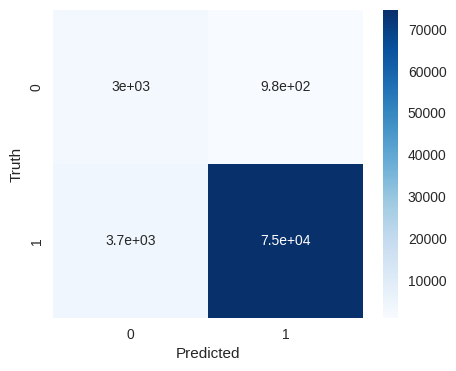

In [ ]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# **Decision Tree**

In [ ]:
# Decision Tree
tree = DecisionTreeClassifier()
y_pred_tree_fit = tree.fit(X_train, y_train)
y_pred_tree = y_pred_tree_fit.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

In [ ]:
tree_accuracy = accuracy_score(y_pred_tree, y_test)
tree_precision = precision_score(y_pred_tree, y_test)
tree_recall = recall_score(y_pred_tree, y_test)
tree_f1 = f1_score(y_pred_tree, y_test)
print ("Accuracy: " + str(tree_accuracy))
print ("Precision: " + str(tree_precision))
print ("Recall: " + str(tree_recall))
print ("F1: " + str(tree_f1))

Accuracy: 0.9320434339017636
Precision: 0.9335256058498488
Recall: 0.994751013081672
F1: 0.9631663144589496


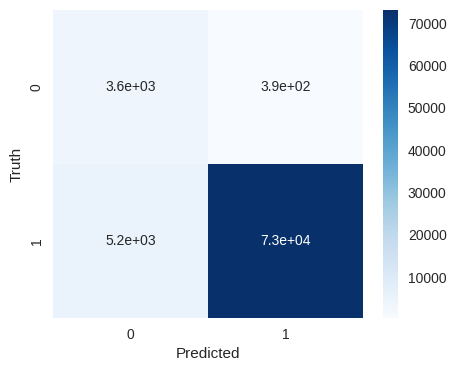

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# **KNN**

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
y_pred_knn_fit = knn.fit(X_train, y_train)
y_pred_knn = y_pred_knn_fit.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

In [ ]:
knn_accuracy = accuracy_score(y_pred_knn, y_test)
knn_precision = precision_score(y_pred_knn, y_test)
knn_recall = recall_score(y_pred_knn, y_test)
knn_f1 = f1_score(y_pred_knn, y_test)
print ("Accuracy: " + str(knn_accuracy))
print ("Precision: " + str(knn_precision))
print ("Recall: " + str(knn_recall))
print ("F1: " + str(knn_f1))

Accuracy: 0.8993708400136035
Precision: 0.8984060948686209
Recall: 0.9954188111532153
F1: 0.9444276754871382


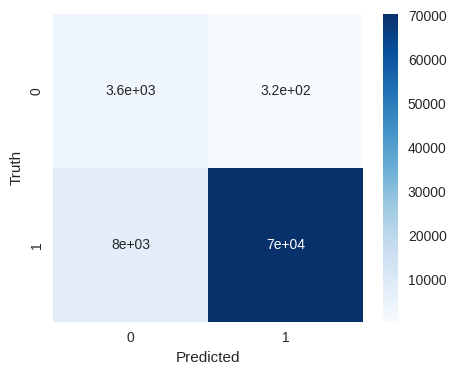

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# **Random Forest**

In [ ]:
#Random Forest
rf = RandomForestClassifier(n_estimators=20)
y_pred_rf_fit = rf.fit(X_train, y_train)
y_pred_rf = y_pred_rf_fit.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [ ]:
rf_accuracy = accuracy_score(y_pred_rf, y_test)
rf_precision = precision_score(y_pred_rf, y_test)
rf_recall = recall_score(y_pred_rf, y_test)
rf_f1 = f1_score(y_pred_rf, y_test)
print ("Accuracy: " + str(rf_accuracy))
print ("Precision: " + str(rf_precision))
print ("Recall: " + str(rf_recall))
print ("F1: " + str(rf_f1))

Accuracy: 0.9341203906136132
Precision: 0.9343168157629433
Recall: 0.9962308309861071
F1: 0.9642810104575508


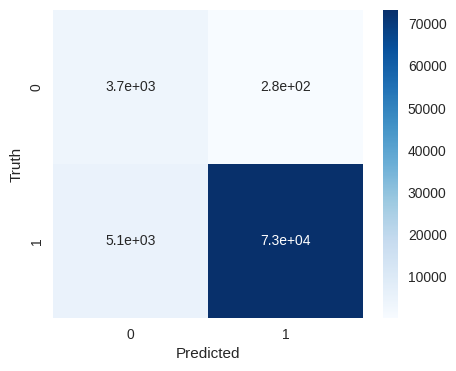

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

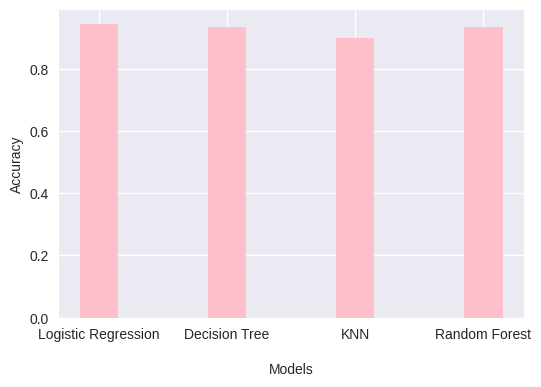

In [ ]:
# Define the data
acc = [log_accuracy, tree_accuracy, knn_accuracy, rf_accuracy]
x = np.arange(4)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))  # Set the figure size
ax.bar(x, acc, width=0.3, tick_label=["Logistic Regression", "Decision Tree", "KNN", "Random Forest"], color='pink')
ax.set_xlabel('\nModels', fontsize=10)  # Set the x-axis label font size
ax.set_ylabel('Accuracy', fontsize=10)  # Set the y-axis label font size
ax.tick_params(axis='both', labelsize=10)  # Set the tick label font size

plt.show()

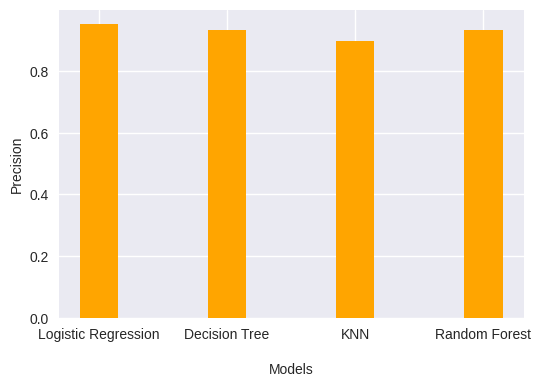

In [ ]:
# Define the data
acc = [log_precision, tree_precision, knn_precision, rf_precision]
x = np.arange(4)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))  # Set the figure size
ax.bar(x, acc, width=0.3, tick_label=["Logistic Regression", "Decision Tree", "KNN", "Random Forest"], color='orange')
ax.set_xlabel('\nModels', fontsize=10)  # Set the x-axis label font size
ax.set_ylabel('Precision', fontsize=10)  # Set the y-axis label font size
ax.tick_params(axis='both', labelsize=10)  # Set the tick label font size

plt.show()

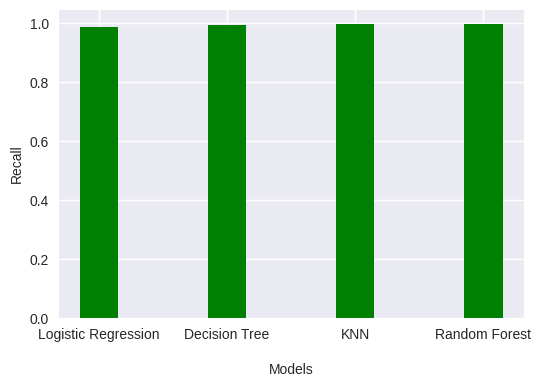

In [ ]:
# Define the data
acc = [log_recall, tree_recall, knn_recall, rf_recall]
x = np.arange(4)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))  # Set the figure size
ax.bar(x, acc, width=0.3, tick_label=["Logistic Regression", "Decision Tree", "KNN", "Random Forest"], color='green')
ax.set_xlabel('\nModels', fontsize=10)  # Set the x-axis label font size
ax.set_ylabel('Recall', fontsize=10)  # Set the y-axis label font size
ax.tick_params(axis='both', labelsize=10)  # Set the tick label font size

plt.show()

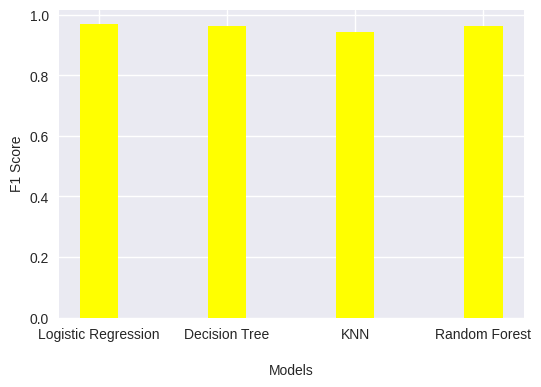

In [ ]:
# Define the data
acc = [log_f1, tree_f1, knn_f1, rf_f1]
x = np.arange(4)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))  # Set the figure size
ax.bar(x, acc, width=0.3, tick_label=["Logistic Regression", "Decision Tree", "KNN", "Random Forest"], color='yellow')
ax.set_xlabel('\nModels', fontsize=10)  # Set the x-axis label font size
ax.set_ylabel('F1 Score', fontsize=10)  # Set the y-axis label font size
ax.tick_params(axis='both', labelsize=10)  # Set the tick label font size

plt.show()

RESULT:

Accuracy of the various binary classification algorithms used:

1. Logistic Regression: 0.9425861147548948
2. Decision Tree: 0.9320434339017636
3. KNN: 0.8993708400136035
4. Random Forest: 0.9341203906136132

The accuracy of Logistic Regression is the highest which suggests that it is performing well in distinguishing between 'bad connections' (intrusion/attacks) and 'good (normal) connections' within the UNSW-NB15 dataset. This implies that the logistic regression model has learned patterns and features that effectively differentiate between malicious and normal network traffic within the dataset.